In [470]:
import numpy as np
import matplotlib.pyplot as plt
import random
import queue
import time
from IPython.display import clear_output

In [471]:
'''
Define the grid to be working with

            **inputs**

-dim = dimension size of the grid 
-p = probability that a grid spot will be filled or open
'''

def grid(dim, p):
    #start with a dim by dim zero array
    a = np.zeros((dim,dim))
    for item in range(dim):
        for thing in range(dim):
            #makes sure the top left spot is empty
            if item == 0 and thing == 0:
                pass
            #makes sure the bottom right spot is empty
            elif item == dim - 1 and thing == dim - 1:
                pass
            #change the cells based off of the value of p and our random number
            else:
                x = random.random()
                #if our random number is less than p, then the cell will not be filled
                if p < x:
                    a[item][thing] = 0
                #if our random number is greater than p, then the cell will  be filled
                else:
                    a[item][thing] = 1
    
    #plots the initial state of the maze 
    plt.figure(figsize=(5,5))
    plt.imshow(a, cmap=plt.cm.binary)
    plt.show()
    time.sleep(2)
    #plt.imshow(a)
    return a


'''
update the state of the maze after moving to the next tile

            **inputs**

-maze = the maze to be updated
-i = which row to update
-j = which column to update
'''
def update(maze, i, j):
    clear_output()
    #shades the tile grey to distinguish between open and occupied
    maze[i][j] = 0.5
    
    
    #plt.figure(figsize=(5,5))
    #plt.imshow(maze, cmap=plt.cm.binary)
    #plt.show()
    #time.sleep(0.1)


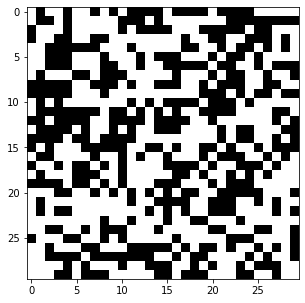

In [472]:
#print a practice grid
a = grid(30,0.5)

In [476]:
#BFS Search Algorithm

def BFS(maze):
    #initialize the solved state of the maze to be false and our pointers to be at the beginning
    #i controls row and j controls column
    solved = False
    i, j = 0, 0
    
    #initialize the fringe and store the starting point of the maze
    fringe = queue.Queue()
    fringe.put([i, j])
    
    #runs until we reach the end
    while solved == False:
        '''
        *****this is just for debugging*****
        
        #print out the length of the current fringe
        print(queue.Queue.qsize(fringe))
            
        #looks at the queue
        for q_item in fringe.queue:
            #print(q_item)
        '''
        
        #Is the maze unsolvable?
        if queue.Queue.qsize(fringe) == 0:
            #update the state of the maze, display the end result, and break the loop
            update(maze, i , j)
            plt.figure(figsize=(5,5))
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.show()
            print("UNSOLVABLE")
            break
            
        #gets the current node and update i and j
        current = fringe.get()
        i, j = current[0], current[1]
        
        #check if we have reached a solution, display the end result, and break the loop
        if i + 1 == len(maze) and j + 1 == len(maze[i]):
            update(maze, i , j)
            plt.figure(figsize=(5,5))
            plt.imshow(maze, cmap=plt.cm.binary)
            plt.show()
            print("SOLVED")
            break
        
        #check down position
        
        #are we outside?
        if j + 1 >= len(maze[i]):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j + 1] == 1 or maze[i][j + 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j + 1] in fringe.queue:
                    pass
                else:
                    fringe.put([i, j + 1])

        #check right position
        
        #are we outside?
        if i + 1 >= len(maze):
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i + 1][j] == 1 or maze[i + 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i + 1, j] in fringe.queue:
                    pass
                else:
                    fringe.put([i + 1, j])
        
        #check up solution
        if j - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i][j - 1] == 1 or maze[i][j - 1] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i, j - 1] in fringe.queue:
                    pass
                else:
                    fringe.put([i, j - 1])
        
        #check left solution
        if i - 1 < 0:
            pass
        else:
            #is the next position occupied or previously visited?
            if maze[i - 1][j] == 1 or maze[i - 1][j] == 0.5:
                pass
            else:
                #add to fringe if valid and is not already in fringe
                if [i - 1, j] in fringe.queue:
                    pass
                else:
                    fringe.put([i - 1, j])
        
        #after done checking, update the maze and start over
        update(maze, i, j)

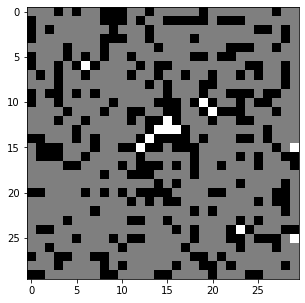

SOLVED


In [488]:
#test the algorithm
BFS(grid(30,0.3))